<a href="https://colab.research.google.com/github/marcelofenerich/Data_Fun/blob/main/Projeto_do_M%C3%B3dulo_1_An%C3%A1lise_dos_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**


## Obtendo do dados

In [60]:
#Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Lendo a base da airbnb 5 primeiras entradas
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2021-09-10/visualisations/listings.csv',nrows=5)
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [64]:
# Lendo a base da airbnb 
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2021-09-10/visualisations/listings.csv',dtype={'id':'str','host_id':'str','latitude':'str','longitude':'str'})
# Normalizando os tipos:
#os id e a latidude e longetude vão considerar como string pois não são valores que podemos somar ou fazer qualquer tipo de operação matemática

df.dtypes

id                                  object
name                                object
host_id                             object
host_name                           object
neighbourhood_group                 object
neighbourhood                       object
latitude                            object
longitude                           object
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
number_of_reviews_ltm                int64
license                             object
dtype: object

## Analisando os Dados

**Dicionario**


*   id - Id do produto 
*   name - Nome do produto
*   host_id - Id unico para o host/usarios
*   host_name - Nome do host do produto
*   neighbourhood_group - Distrito
*   neighbourhood -  Bairro
*   latitude - Coordenadas de latitude
*   longitude - Coordenadas de longetude
*   room_type - Tipo de locação (casa toda, um quarto ou quarto compartilhado)
*   price -  Preço da locação diario (moeda do local)
*   minimum_nights -  Noites minimas necessarias para alugar
*   number_of_reviews - Número de avaliações que o produto recebeu
*   reviews_per_month - Quantidade média de avaliações por mês
*   calculated_host_listings_count -  Quantidade de imóveis do host
*   availability_365 - Quantidade de dias que o produto ficará disponivel dentro de 365 dias
*  number_of_reviews_ltm - Número de avaliações que o produto teve dentro de um ano
*  license - Número de registro






**Possiveis Analises a serem feita**


*   Qual é o preço médio de aluguel nas casas de barcelona
 *  Por bairro tambem

*   Qual é o tipo de aluguel mais procurado

* Qual é lugar mais caro e o mais barato para se alugar


In [65]:
# Formato da base
entradas=df.shape[0]
variaveis= df.shape[1]
print('Temos {0} entradas e {1} variaveis'.format(entradas,variaveis))

Temos 16206 entradas e 18 variaveis


In [66]:
# Analisando dados vazios
print(df.isna().sum()/entradas)

print('Total de {0:.2%}'.format(df.isna().sum().sum()/entradas,'.2f'))

id                                0.000000
name                              0.000617
host_id                           0.000000
host_name                         0.002468
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.272553
reviews_per_month                 0.272553
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.370665
dtype: float64
Total de 91.89%


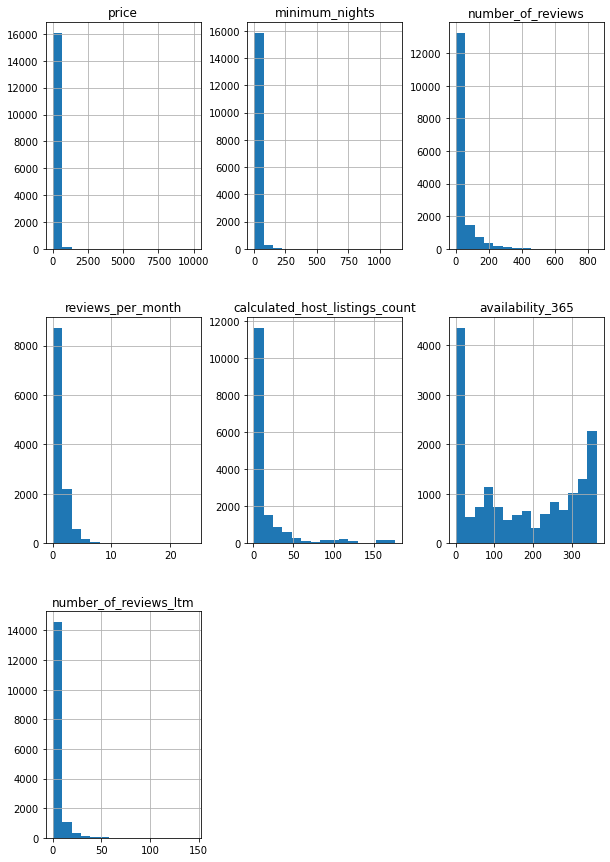

In [67]:
#Distribuições normal dos valores
df.hist(bins=15,figsize=(10,15));

In [69]:
# Analisando a correlação dos valores
df.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.026580,0.001127,-0.013837,0.037240,0.061427,-0.010607
minimum_nights,0.026580,1.000000,-0.123203,-0.137558,0.062688,0.114693,-0.117728
number_of_reviews,0.001127,-0.123203,1.000000,0.551642,-0.113397,0.038861,0.473026
reviews_per_month,-0.013837,-0.137558,0.551642,1.000000,-0.045938,0.080239,0.586844
calculated_host_listings_count,0.037240,0.062688,-0.113397,-0.045938,1.000000,0.168057,-0.044455
availability_365,0.061427,0.114693,0.038861,0.080239,0.168057,1.000000,0.085883
number_of_reviews_ltm,-0.010607,-0.117728,0.473026,0.586844,-0.044455,0.085883,1.000000


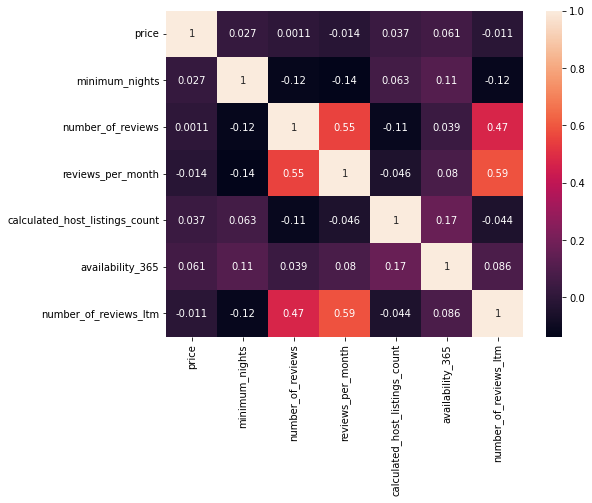

In [70]:
#Mapa de correlação

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Não mostrou muita correlação entre as variaveis com exceção as variaveis sobre avaliação que apresentaram um valor levemente significante

In [71]:
# Resumo das estatiticas basicas
df.describe()

# outlines:todos os valores maximos apresentaram um valor muito longe do percentil de 75%, com exeção availability_365, pode ser um sinal de outliner 


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,16206.000000,16206.000000,16206.000000,11789.000000,16206.000000,16206.000000,16206.000000
mean,109.258299,13.484882,33.403924,1.157067,16.974824,164.860607,3.141553
std,294.915363,32.938037,66.333137,1.423244,32.723171,136.379889,7.647645
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.000000,1.000000,0.000000,0.180000,1.000000,9.000000,0.000000
50%,70.000000,3.000000,4.000000,0.690000,3.000000,151.500000,0.000000
75%,122.000000,30.000000,34.000000,1.660000,16.000000,308.000000,3.000000
max,9999.000000,1124.000000,853.000000,24.000000,177.000000,365.000000,145.000000


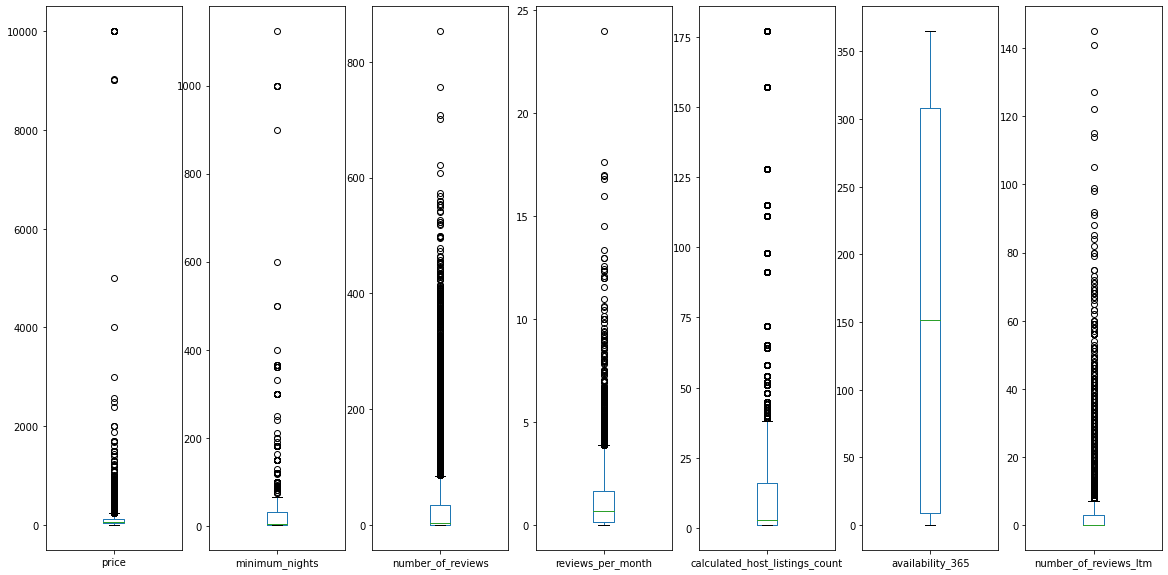

In [82]:
df.plot(kind='box',figsize=(20,10),subplots=True);

Respondendo as Perguntas

Qual é o preço médio de aluguel nas casas de barcelona

Por bairro tambem

In [86]:
print('Preço médio das casas em Barcelona é de : € {:.2f}'.format(df.price.mean()))

Preço médio das casas em Barcelona é de : € 109.26


In [123]:
#Preço médio por bairro
média_bairro=df.groupby('neighbourhood').price.mean()
média_bairro.sort_values(ascending=False)[:10]
# pode se perceber que Les corts tem uma maior média de preço, temos que vê se não teve nenhuma influencia no dados para dar esse resultado

neighbourhood
les Corts                                       471.873737
Diagonal Mar i el Front Marítim del Poblenou    222.986395
la Font d'en Fargues                            180.400000
Vallvidrera, el Tibidabo i les Planes           176.958333
la Vila Olímpica del Poblenou                   176.189189
el Clot                                         171.229167
Pedralbes                                       164.547619
la Dreta de l'Eixample                          151.506091
Sant Gervasi - Galvany                          144.460784
la Marina del Prat Vermell                      142.875000
Name: price, dtype: float64

In [128]:
#verificando se exite entradas suficientes para consideramos
df.neighbourhood.loc[df.neighbourhood.isin(média_bairro.sort_values(ascending=False)[:10].index)].value_counts()

la Dreta de l'Eixample                          1970
Sant Gervasi - Galvany                           306
les Corts                                        198
la Vila Olímpica del Poblenou                    148
Diagonal Mar i el Front Marítim del Poblenou     147
el Clot                                           96
Pedralbes                                         42
Vallvidrera, el Tibidabo i les Planes             24
la Font d'en Fargues                              10
la Marina del Prat Vermell                         8
Name: neighbourhood, dtype: int64

Pode se ver os bairros **la Marina del Prat Vermell** e **la Font d'en Fargue** estão entre os bairros mais caros, porém não temos dados os suficiente fazer afirmar esse valor

In [112]:
# O bairro onde tem o maior aluguel e o que tem o menor
maximo_aluguel_bairro=média_bairro.loc[média_bairro==média_bairro.max()]
minimo_aluguel_bairro=média_bairro.loc[média_bairro==média_bairro.min()]

print( ' O bairro {0} tem o maior aluguel médio, onde se paga na média €{1:.2f}, '
'enquanto o bairro {2} tem a menor média de aluguel, se paga €{3:.2f}'.format(maximo_aluguel_bairro.index[0],maximo_aluguel_bairro[0],minimo_aluguel_bairro.index[0],minimo_aluguel_bairro[0]))


 O bairro les Corts tem o maior aluguel médio, onde se paga na média €471.87, enquanto o bairro Montbau tem a menor média de aluguel, se paga €24.89


Qual é o tipo de aluguel mais procurado

In [113]:
# Quantidade de tipos alocações que acontecem
df.room_type.value_counts()

Entire home/apt    8678
Private room       7104
Hotel room          241
Shared room         183
Name: room_type, dtype: int64

In [114]:
# em %
df.room_type.value_counts()/entradas

Entire home/apt    0.535481
Private room       0.438356
Hotel room         0.014871
Shared room        0.011292
Name: room_type, dtype: float64

In [115]:
# olhando no bairro onde tem a maior média
df.room_type.loc[df.neighbourhood==maximo_aluguel_bairro.index[0]].value_counts()

Entire home/apt    122
Private room        74
Shared room          2
Hotel room           0
Name: room_type, dtype: int64

In [116]:
# olhando no bairro onde tem a menor média
df.room_type.loc[df.neighbourhood==minimo_aluguel_bairro.index[0]].value_counts()

Private room       8
Entire home/apt    1
Shared room        0
Hotel room         0
Name: room_type, dtype: int64

## Conclusão

Foi feita uma analise rasa sobre os dados é percepitivel que exista outiliners para ser tratado, pode ser por uma falta de conhecimento sobre a região, mas na anlise de dados fez sentido olhando os dois bairros maior aluguel e menor aluguel.





No maior aluguel os tipos alugados mais comuns são os que são o lugar todo isso deixando mais caro mesmo


Enquanto no menor são mais quartos individuais 




